In [ ]:
!pip install mdtraj
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

# Load the trajectory file (assuming it's already loaded from previous steps)
trajectory = md.load('adp_exchange3temps.xtc', top='adp.gro')

# Compute the phi and psi dihedral angles
phi_indices, phi_angles = md.compute_phi(trajectory)
psi_indices, psi_angles = md.compute_psi(trajectory)

# Convert the angles to degrees for easier interpretation
phi_degrees = np.rad2deg(phi_angles[:, 0])
psi_degrees = np.rad2deg(psi_angles[:, 0])

# Create 2D histogram of phi and psi dihedral angles
# Adjust bin size for finer or coarser grids (e.g., bins=100)
hist, xedges, yedges = np.histogram2d(phi_degrees, psi_degrees, bins=100, density=True)

# Compute free energy surface: F(phi,psi) = -log(histogram)
# Use np.maximum to avoid taking log of zero
free_energy = -np.log(np.maximum(hist, 1e-12))

# Normalize: F(phi,psi) - min(F(phi,psi))
free_energy -= free_energy.min()

# Plotting the free energy surface
fig, ax = plt.subplots(figsize=(8, 6))

# Create a meshgrid for the contour plot
X, Y = np.meshgrid(xedges[:-1], yedges[:-1])

# Plot filled contour plot with a colorbar
contour = ax.contourf(X, Y, free_energy.T, levels=50, cmap='viridis')
cbar = plt.colorbar(contour)
cbar.set_label('Free Energy (kT)')

# Label the axes
ax.set_xlabel('Phi (degrees)')
ax.set_ylabel('Psi (degrees)')
ax.set_title('Free Energy Surface in Phi-Psi Space')

# Display the plot
plt.show()


/ext3/miniconda3/lib/python3.9/site-packages/numpy/lib/histograms.py:1124: RuntimeWarning: invalid value encountered in true_divide
  hist /= s


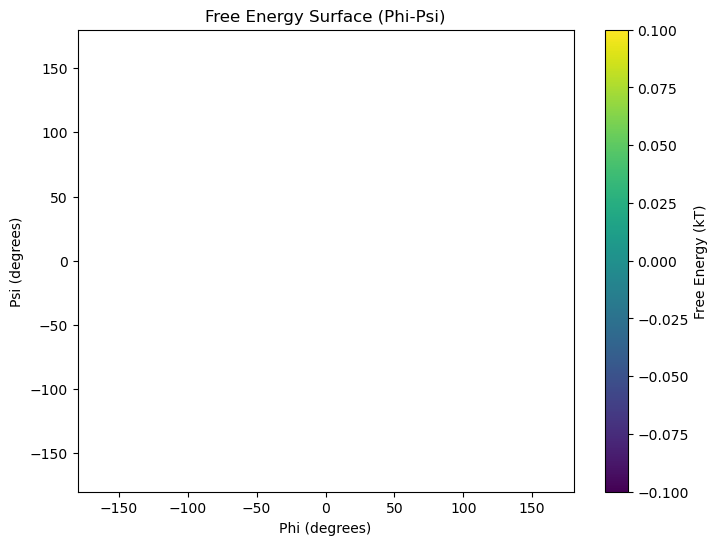

In [2]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

# Function to compute FES from an MDTraj trajectory
def compute_fes_from_trajectory(trajectory, bins=25):
    # Compute the phi and psi dihedral angles
    phi_indices, phi_angles = md.compute_phi(trajectory)
    psi_indices, psi_angles = md.compute_psi(trajectory)
    
    # Convert radians to degrees for easier interpretation
    phi_degrees = np.rad2deg(phi_angles[:, 0])
    psi_degrees = np.rad2deg(psi_angles[:, 0])

    # Remove NaN values (which can occur if the dihedral is undefined)
    mask = ~np.isnan(phi_degrees) & ~np.isnan(psi_degrees)
    phi_degrees = phi_degrees[mask]
    psi_degrees = psi_degrees[mask]

    # Compute a 2D histogram of the phi and psi angles
    hist, xedges, yedges = np.histogram2d(
        phi_degrees, psi_degrees, bins=bins, range=[[-180, 180], [-180, 180]], density=True
    )

    # Compute the free energy F(phi, psi) = -log(histogram)
    free_energy = -np.log(np.maximum(hist, 1e-12))  # Avoid log(0) by setting a small minimum value
    
    # Normalize free energy by subtracting the minimum value
    free_energy -= free_energy.min()

    # Return the free energy surface and bin edges
    return free_energy, xedges, yedges

# Function to plot the free energy surface
def plot_fes(free_energy, xedges, yedges):
    # Create a meshgrid for plotting
    X, Y = np.meshgrid(xedges[:-1], yedges[:-1])
    
    # Plot the FES using imshow to match Ramachandran plot style
    fig, ax = plt.subplots(figsize=(8, 6))
    im = ax.imshow(free_energy.T, extent=[-180, 180, -180, 180], origin='lower', cmap='viridis', aspect='auto')
    
    # Add colorbar
    cbar = plt.colorbar(im)
    cbar.set_label('Free Energy (kT)')
    
    # Set axis labels and title
    ax.set_xlabel('Phi (degrees)')
    ax.set_ylabel('Psi (degrees)')
    ax.set_title('Free Energy Surface (Phi-Psi)')
    
    # Show plot
    plt.show()

# Example usage
# Load the trajectory file
trajectory = md.load('adp_exchange3temps.xtc', top='adp.gro')

# Compute FES with 25 bins
fes, xedges, yedges = compute_fes_from_trajectory(trajectory, bins=25)

# Plot the FES
plot_fes(fes, xedges, yedges)
